In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'
     

## Exploratory data analysis

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/DATA/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
ok cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
df[nums].describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [ ]:
df[cats].describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

In [ ]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In the PreferredLoginDevice variable, there is an ambiguous value between Mobile Phone and Phone. Need to do further preprocessing.

In [ ]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In the PreferredPaymentMode variable there is an ambiguous value between CC and Credit Card, and Cash On Delivery and COD. Need to do further preprocessing.

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In the PreferredOrderCat variable, there is an ambiguous value between Mobile Phone and Phone. Need to do further preprocessing

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
percent = round(df['Churn'].value_counts()*100/len(df['Churn']),2)
print(f'''Value count column {'Churn'}:''')
print(df['Churn'].value_counts())
print('')
print('Percentage :\n',percent)
print('---'*10)
print()

Value count column Churn:
0    4682
1     948
Name: Churn, dtype: int64

Percentage :
 0    83.16
1    16.84
Name: Churn, dtype: float64
------------------------------



## Univariate Analysis

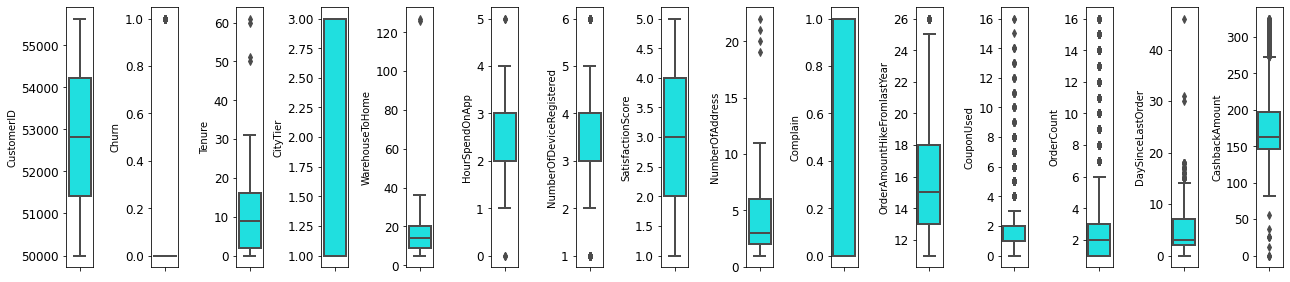

In [ ]:
plt.figure(figsize=(18,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='cyan', orient='v')
    plt.tight_layout(pad = 1)

The results obtained in the diagram above are normally distributed features such as CustomerID, CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain and CashbackAmount.

There are also outliers that need further pre-processing

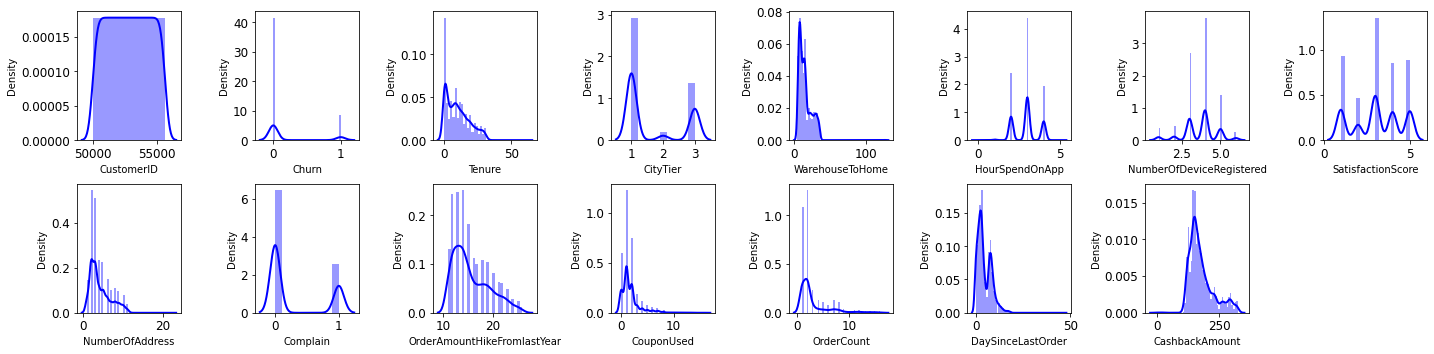

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout(pad = 1)

From the diagram above, there is a positive skew distribution marked with the Mean > Median value. There are several features that are of concern such as Tenure, CouponUsed, DaySinceLastOrder, CashbackAmount

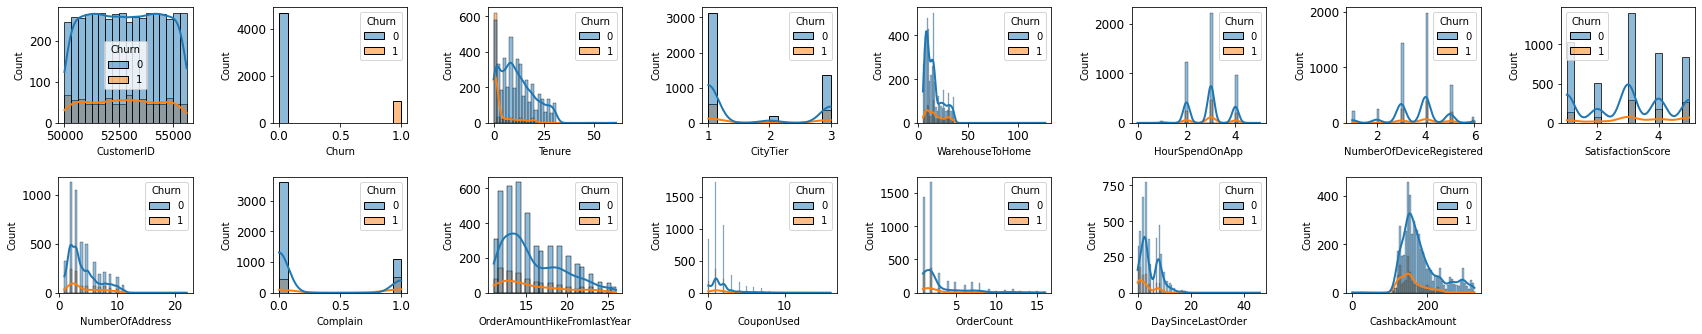

In [ ]:
# KDE plot highlighting Churn as the target variable
plt.figure(figsize=(24, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.histplot(data=df, x=df[nums[i]], hue="Churn", kde="True")
    plt.tight_layout(pad = 2)

The average customer spends 3 hours using e-commerce applications.

There are still many customers who do not use coupons in shopping.

Customers with locations closer to the warehouse (< 15 km) predominate.

The number of customers who complained was quite a lot around 1000 people. This should be a concern in future business development.

By highlighting Churn as the target variable, you can see the distribution of customer data which is churn. From the diagram above it can be seen the proportion of customers who churn for each feature.

Tenure variable is a concern because there are many customers who churn on tenure < 3 months.

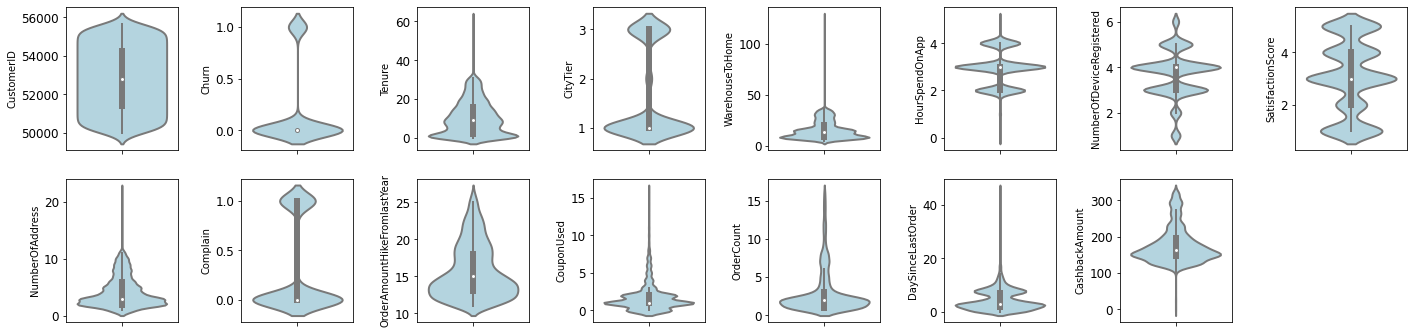

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.violinplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout(pad=2)

The violinplot diagram can better show the concentration of data distribution than the boxplot diagram.

The portion of churned customers is quite large. When viewed from the results of the previous descriptive analysis, it was 16.84% of the total customers.

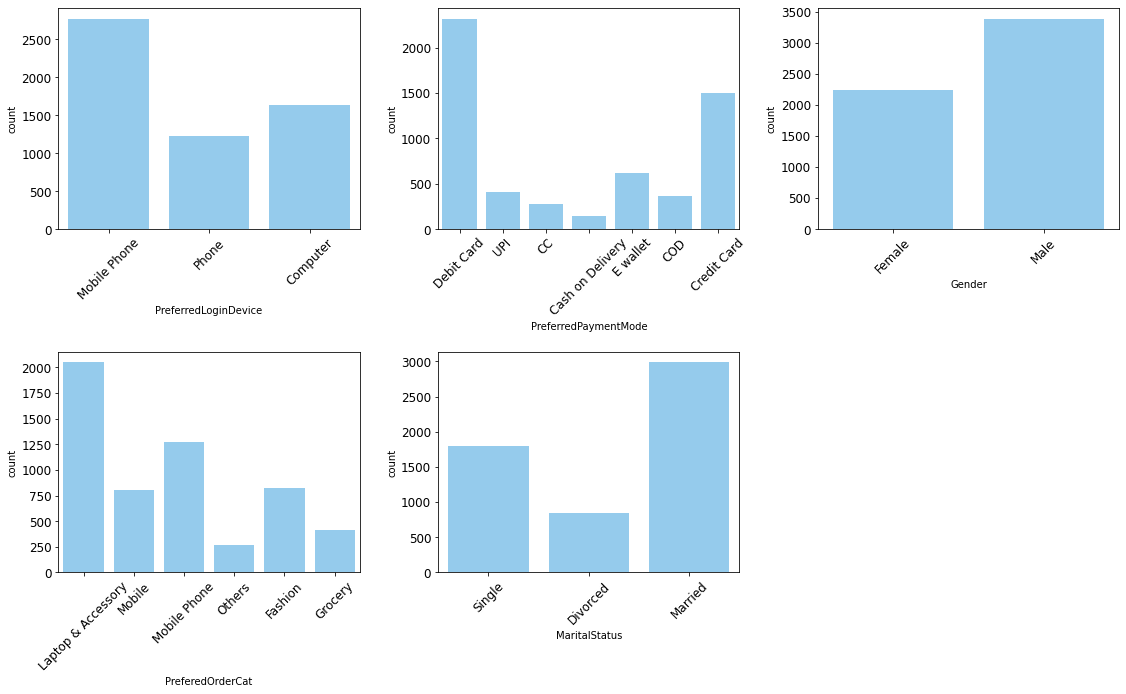

In [ ]:
# Countplot to see distribution of categorical variable data
plt.figure(figsize=(16,10))
for i in range (0, len(cats[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[0:][i]], color='lightskyblue', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

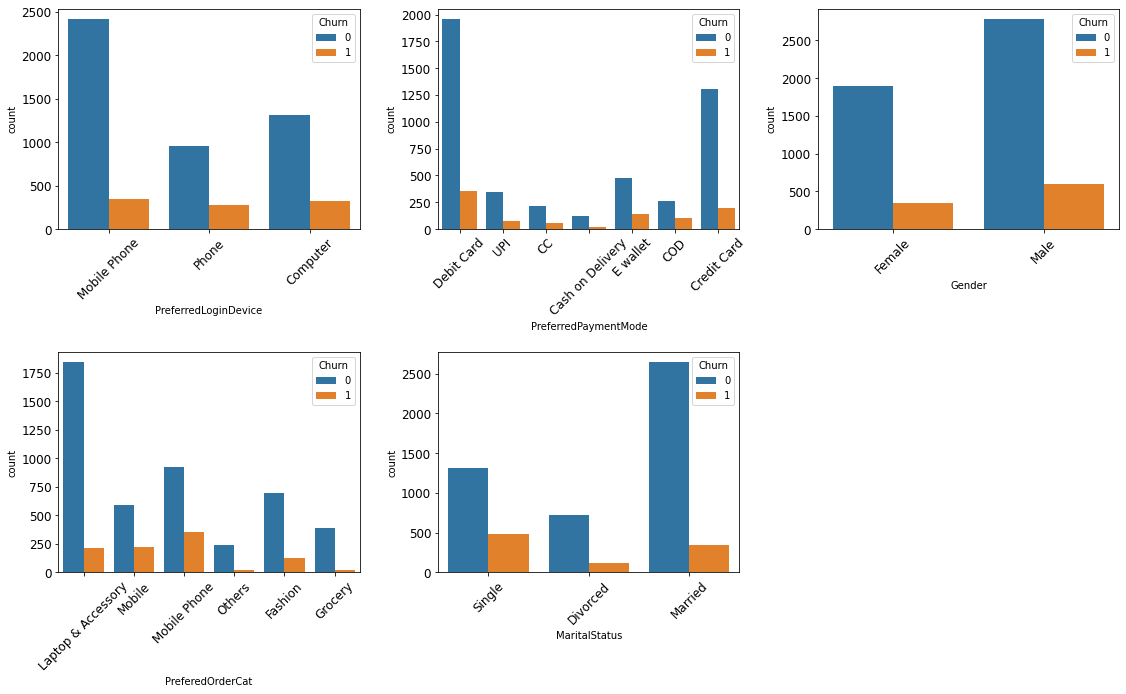

In [ ]:
# Countplot to see distribution of categorical variable data
plt.figure(figsize=(16,10))
for i in range (0, len(cats[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=df[cats[0:][i]], hue='Churn', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

The spread of churn customers is still very small compared to customers who do not churn. It is necessary to analyze the correlation between numerical & categorical variables to see which variables affect the churn rate.

### Multivariate Analysis

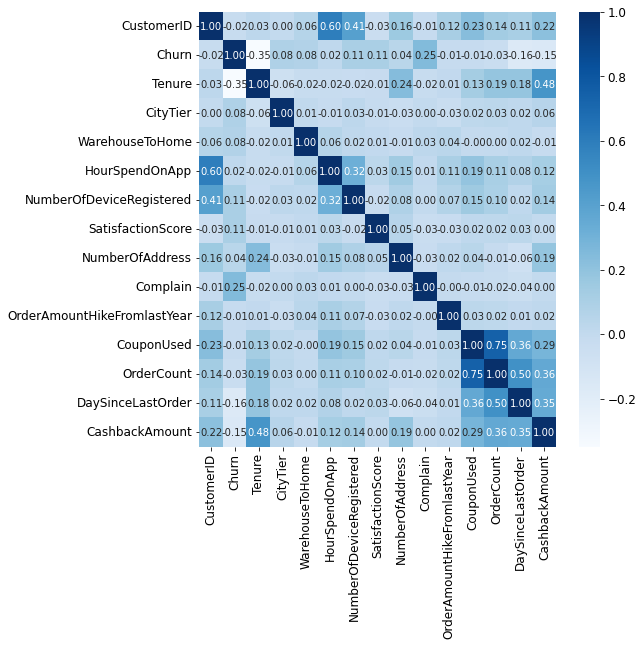

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

From the heatmap above, it can be obtained that there is a feature correlation with the target, where the target is churn. 

The feature that has a high correlation with the churn target is Tenure -0.35. This includes a negative correlation, meaning that the greater the tenure value, the lower the churn rate. 

In addition, the correlation of other features is quite large, namely between churn and complaints of 0.25. Where this includes a positive correlation, meaning that the greater the value of the complaint, the greater the churn rate. 

Thus, features that are relevant and must be maintained are tenure and complain features.

In [ ]:
# Pair Plots (Numeric)
sns.pairplot(df, diag_kind='kde', hue='Churn')

Output hidden; open in https://colab.research.google.com to view.

From the pair plots above, the scatter plot separation doesn't look good enough, so it's quite difficult to get an accurate feature correlation.

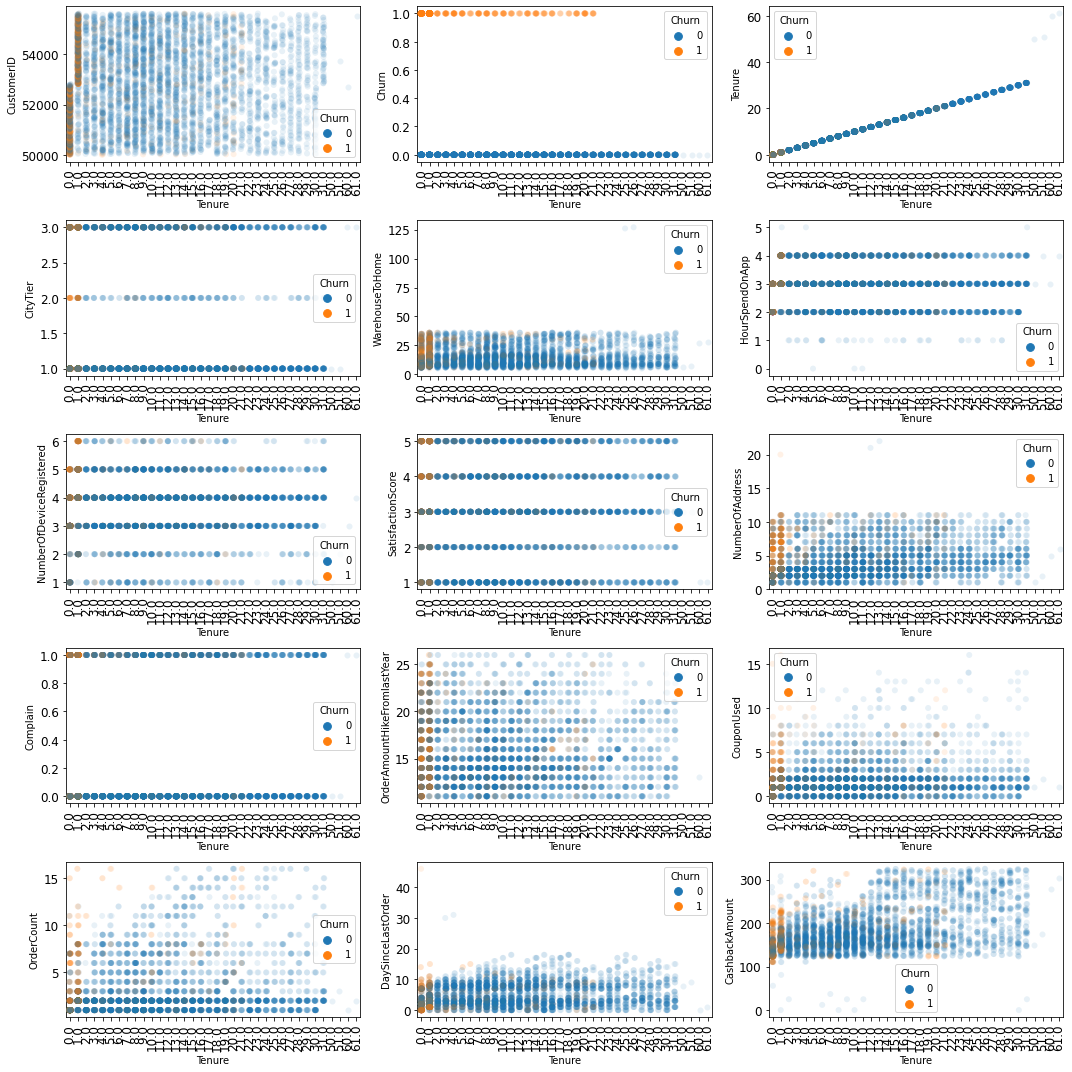

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='Tenure', y=nums[i], hue='Churn', size=6, alpha=0.1)
  plt.tick_params(axis='x', rotation=90)
  plt.tight_layout()

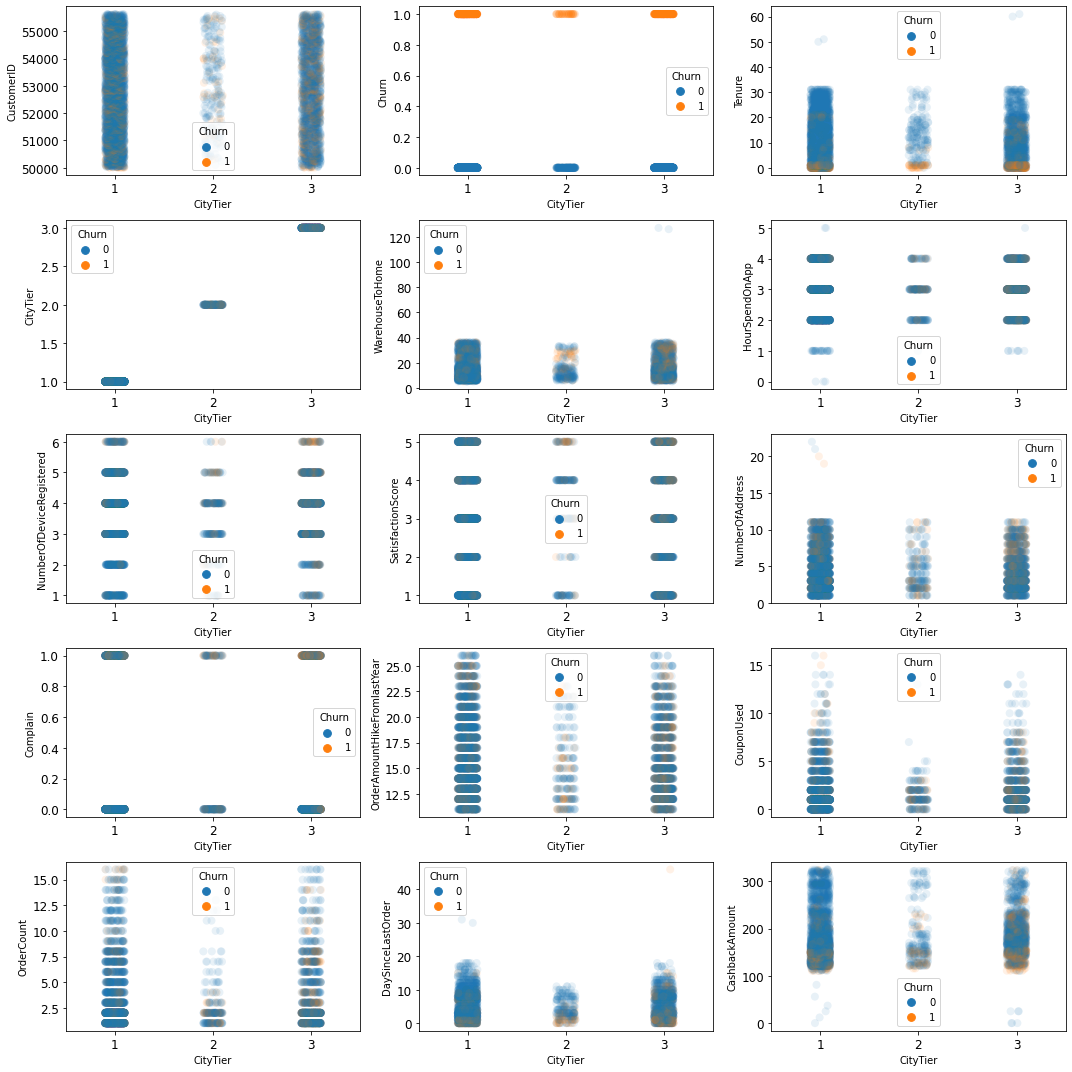

In [ ]:

#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='CityTier', y=nums[i], hue='Churn', size=8, alpha=0.1)
  plt.tight_layout()

It can be seen that the correlation of the CityTier category with all numerical values has no effect, because the stripplot shows an average.

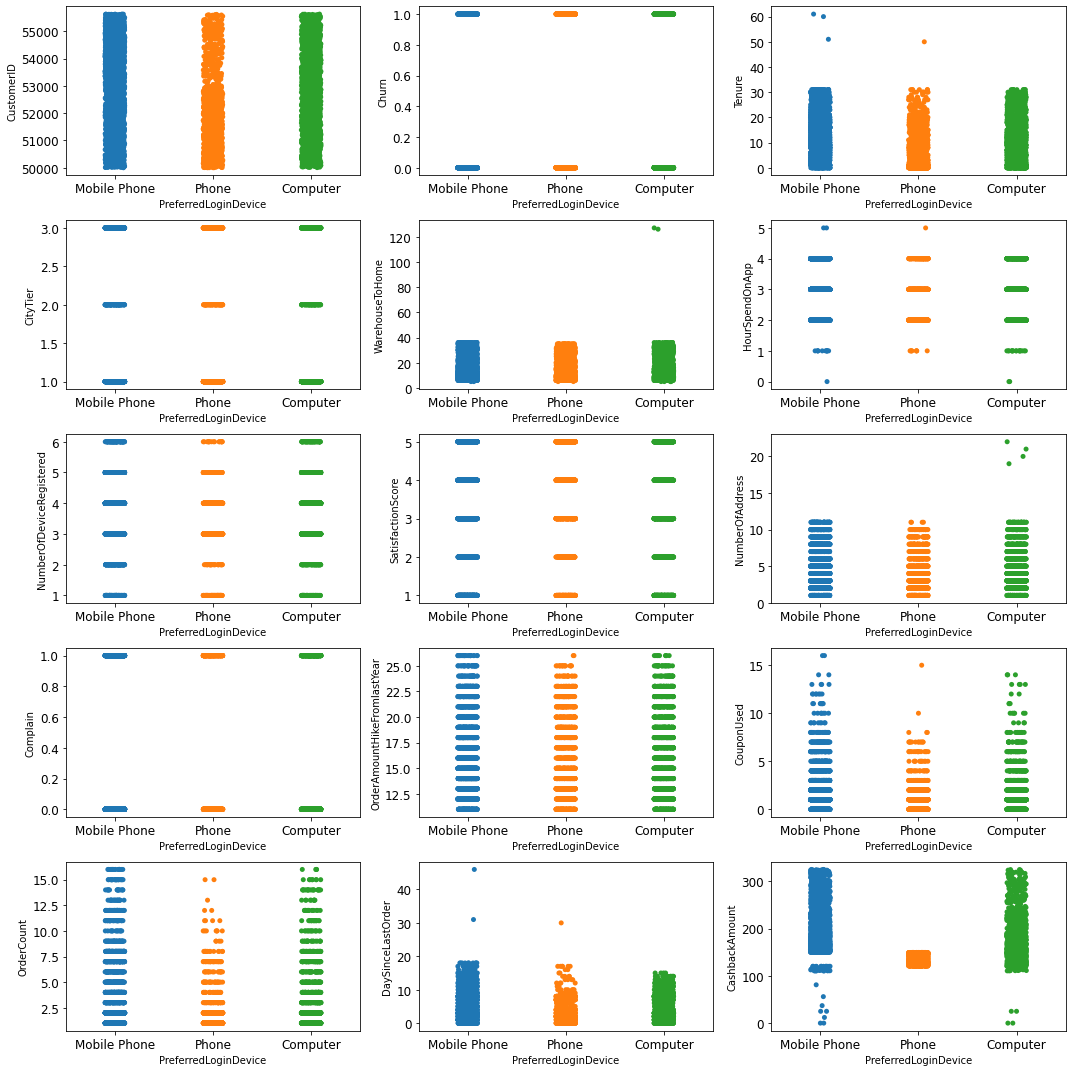

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=nums[i])
  plt.tight_layout()

It can be seen that the correlation of the PreferredLoginDevice category with all numerical values has no effect, because the stripplot shows an average.

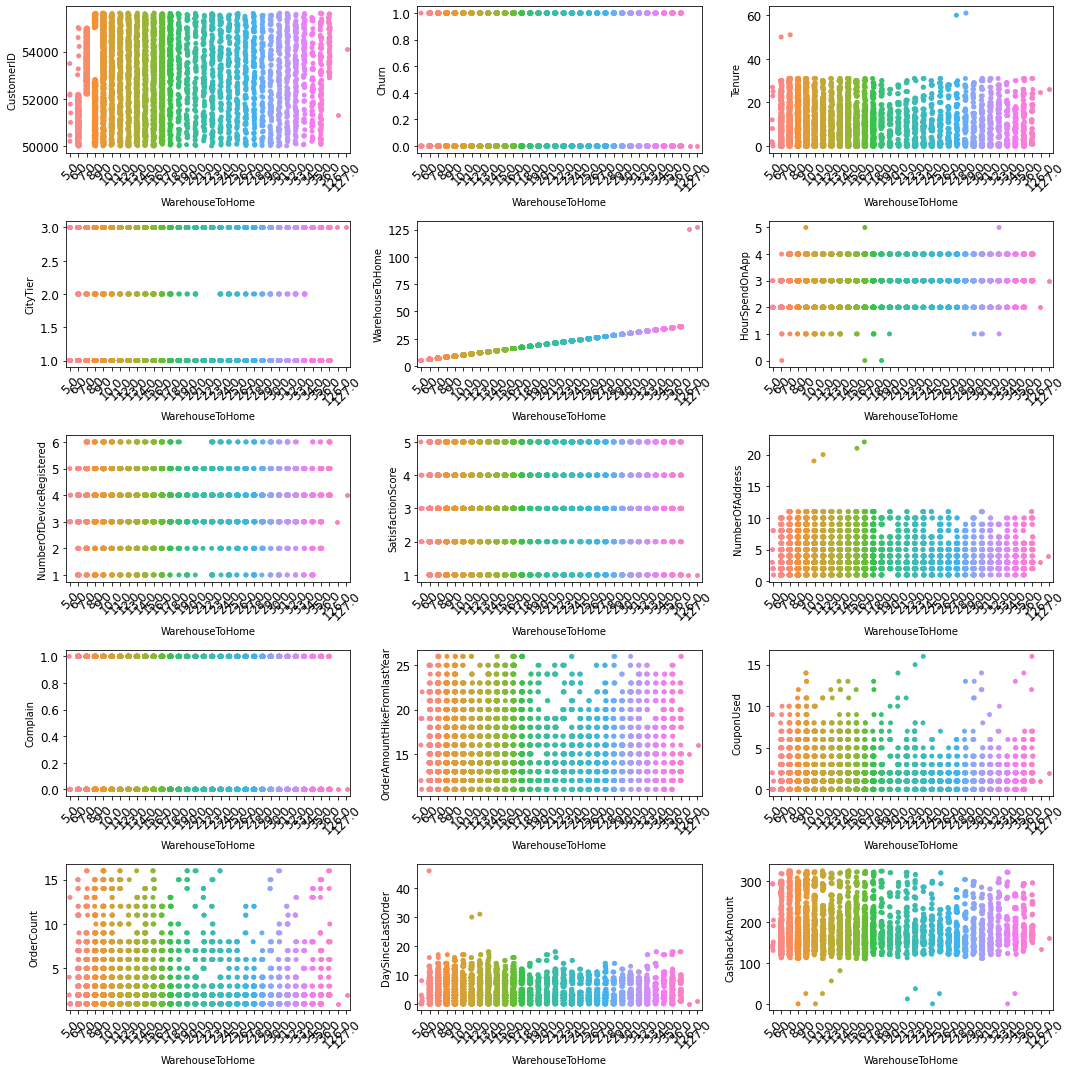

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='WarehouseToHome', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()

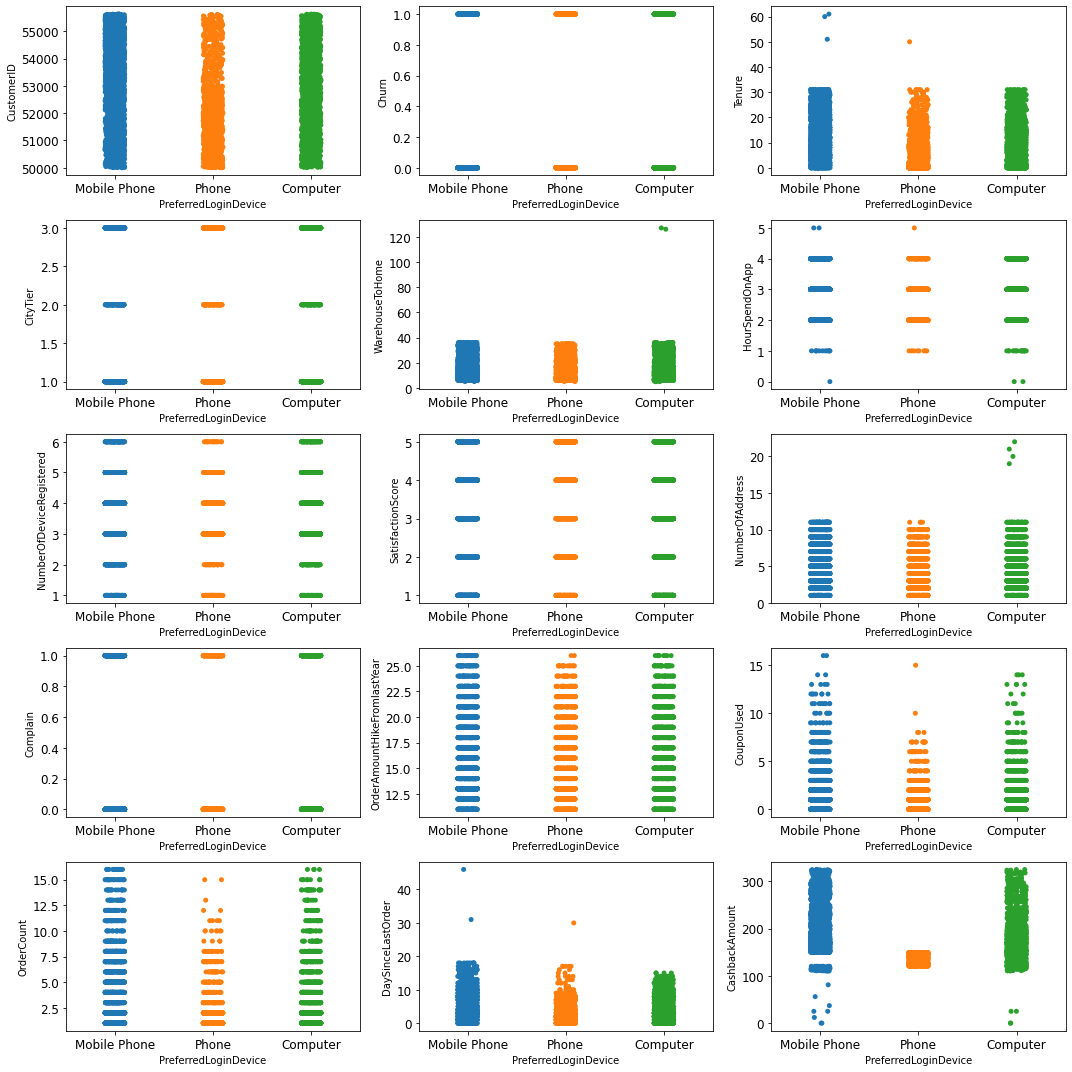

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=nums[i])
  plt.tight_layout()

It can be seen that the correlation of the preferred login device category with all numericals has no effect, because the stripplot shows an average. However, there are two correlations between the cashback ampount and Coupon Used features with the preferred login device, namely those who use fewer phones than the others.

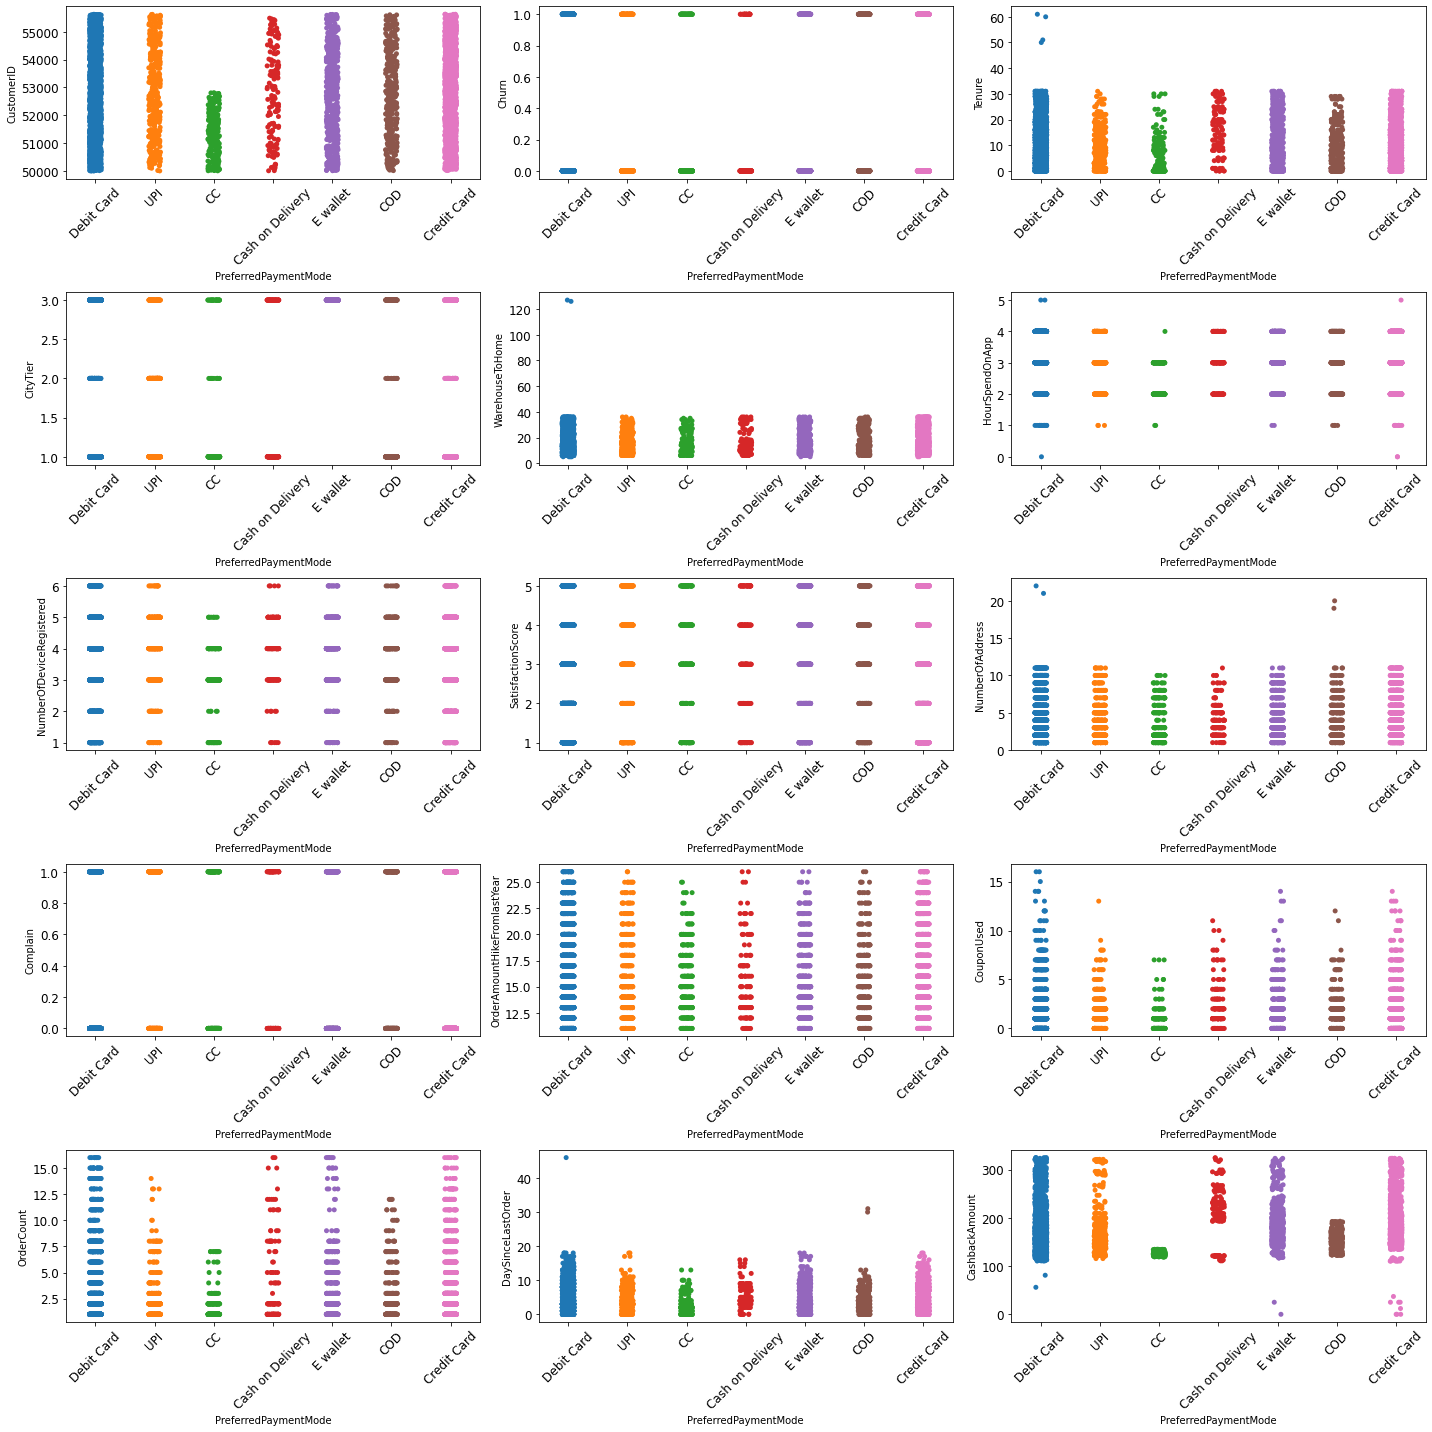

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(20,20))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredPaymentMode', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()

It can be seen that the correlation of the preferred payment method category with all numerical ones has no effect, because the stripplot shows an average.

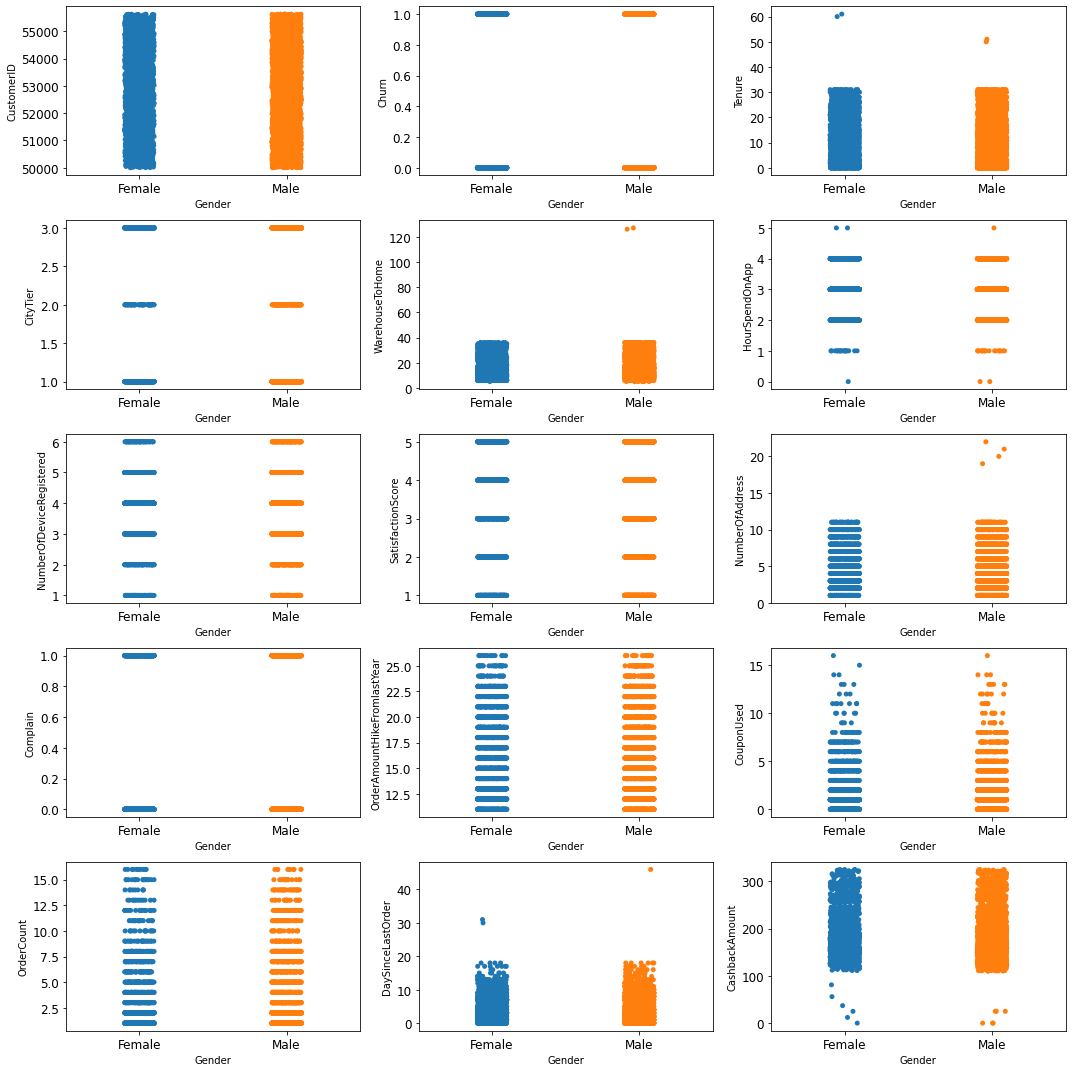

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i])
  plt.tight_layout()

It can be seen that there is no significant correlation between gender categories and all numerical categories, because the strip plots are flat.

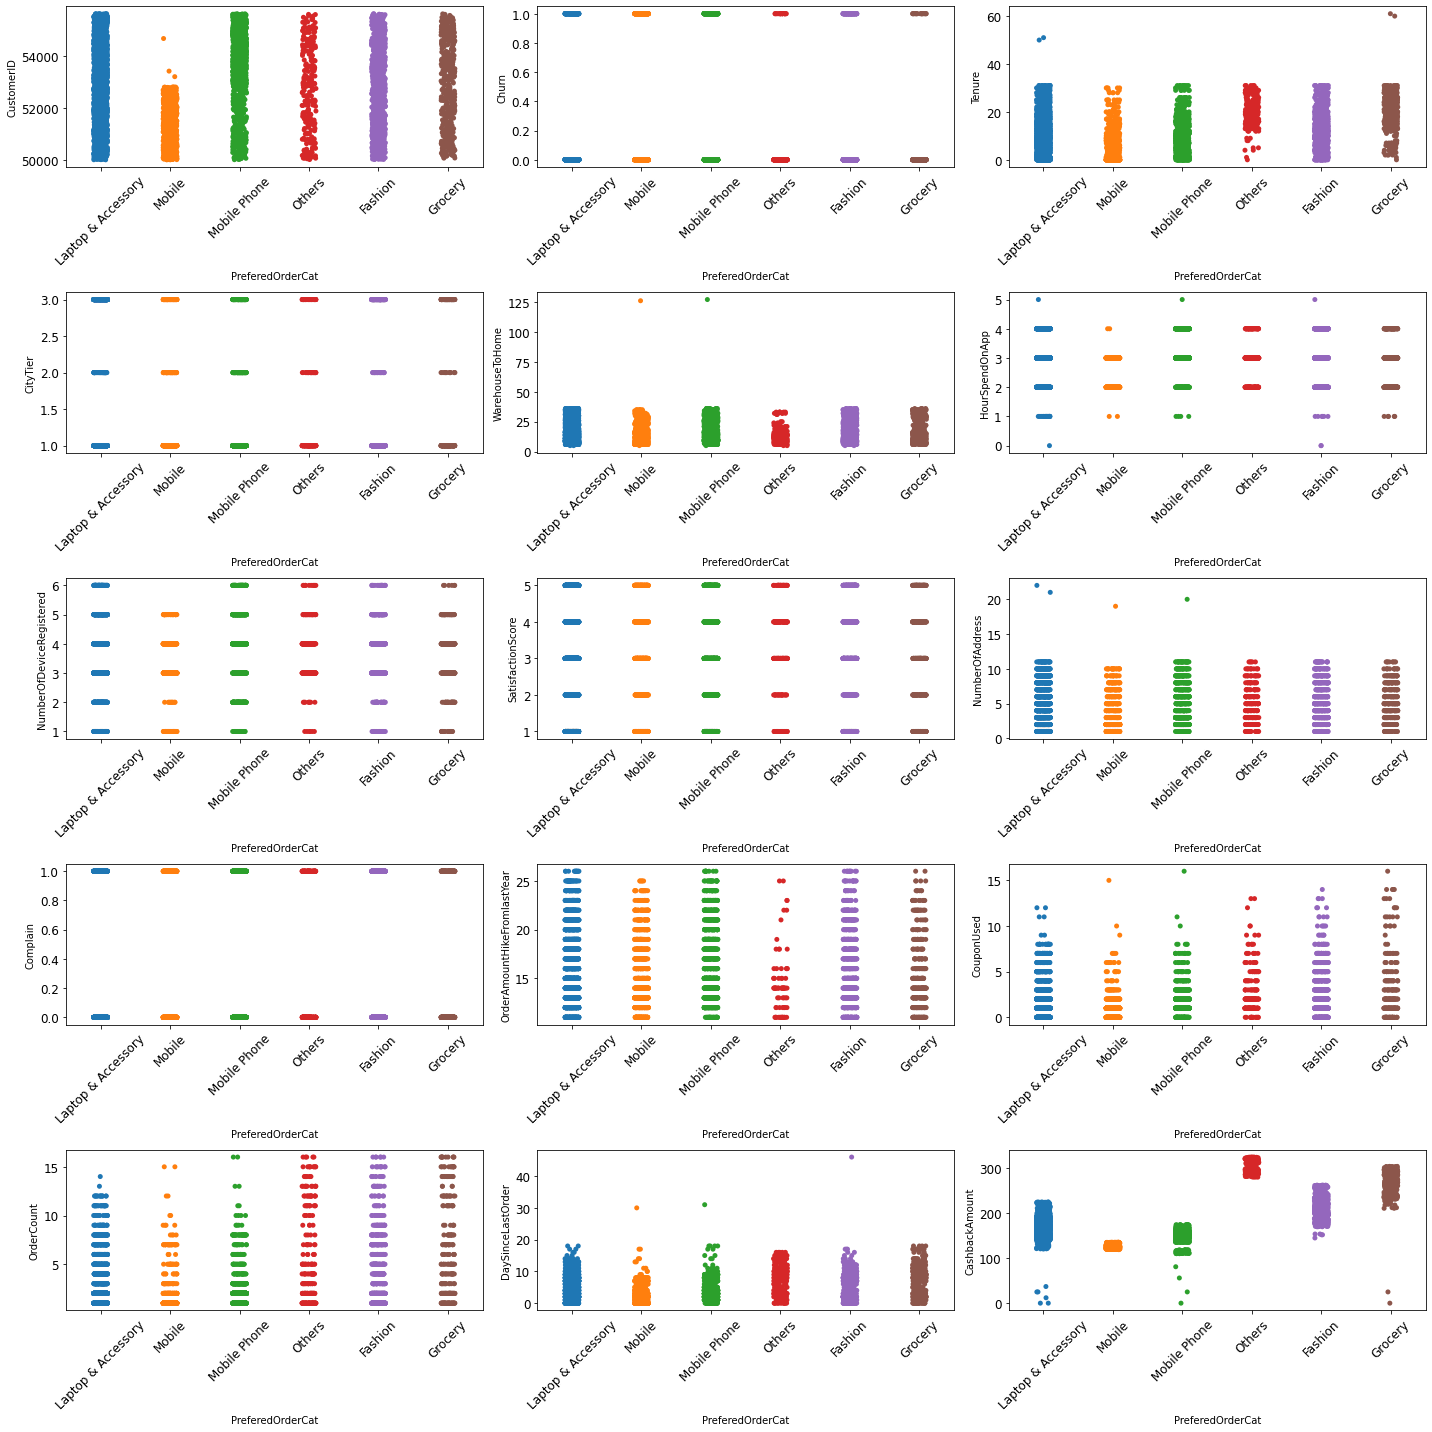

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(20,20))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferedOrderCat', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()

The correlation of preferred order category with all numericals can be seen that there is an interesting pattern in the cashback amount feature, this is because each Cat's preferred order has a varying cashback amount value.

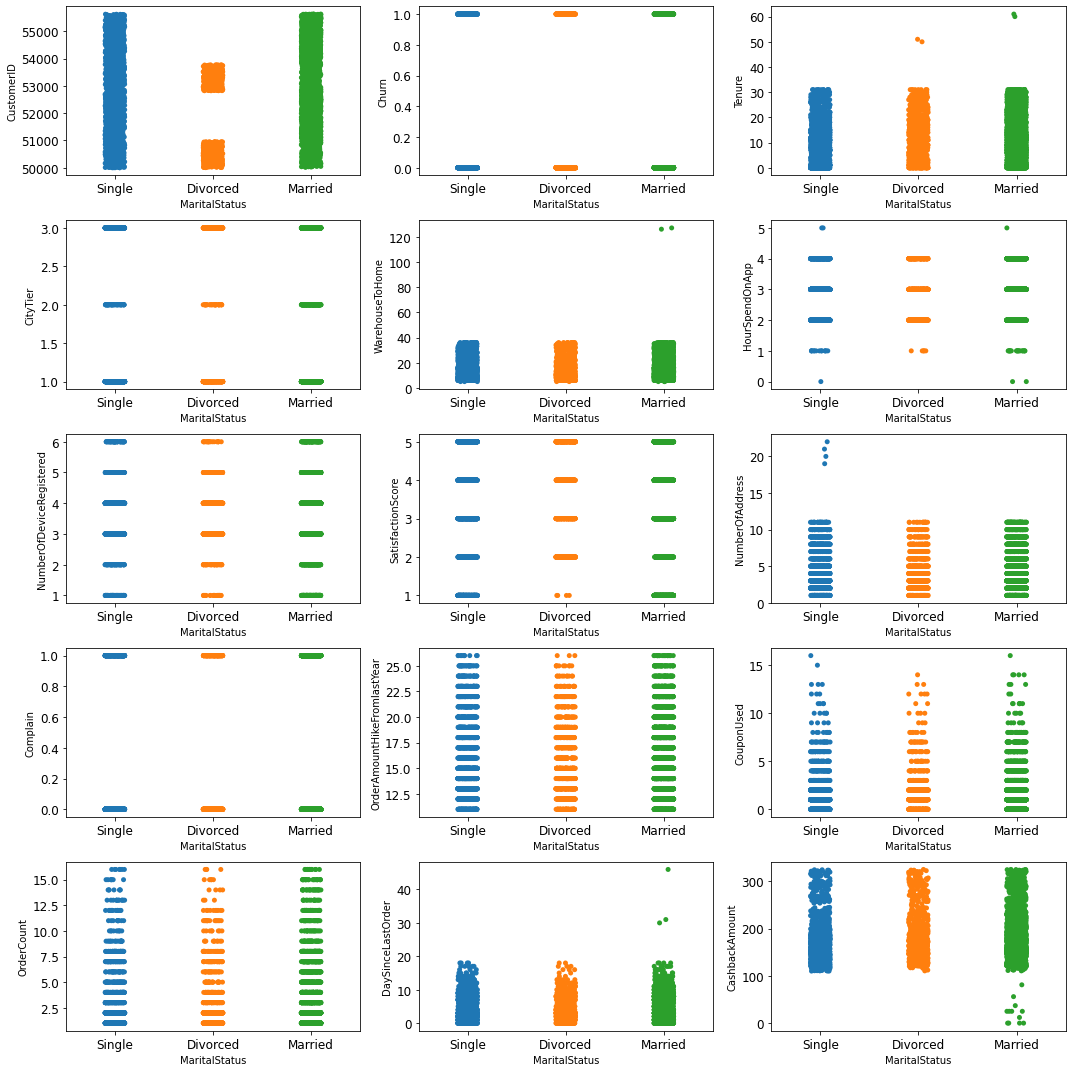

In [ ]:
#Category Plots (Categorical-Numeric) Categorical = 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='MaritalStatus', y=nums[i])
  plt.tight_layout()

It can be seen that the correlation of the Marital Status category with all numerical values has no effect, because the stripplot shows an average.

## Business Insight

Tenure

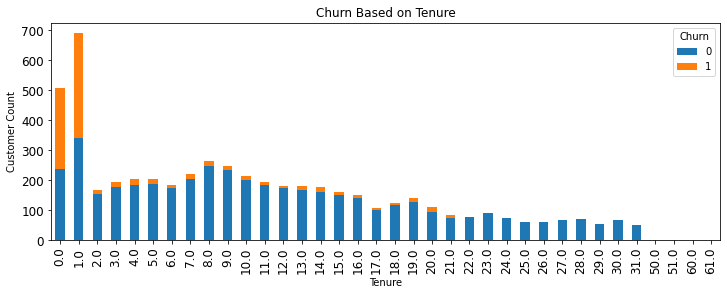

In [ ]:
tenure_churn = pd.crosstab(df["Tenure"], df["Churn"])
tenure_churn.plot(kind = 'bar', stacked = 'true', title = "Churn Based on Tenure")
tenure_churn
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.show()

Based on graphic data, it can be indicated that most of the customers who do churn come from customers with a tenure of less than 2, or are classified as new customers.

Payment Mode

Text(0.5, 1.0, 'Churn Based on Payment Method')

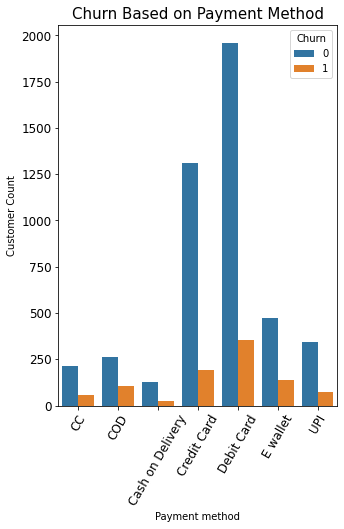

In [ ]:
payment = df.groupby(['PreferredPaymentMode','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,7))
bar = sns.barplot(x="PreferredPaymentMode", y="CustomerID", data=payment, hue="Churn")
plt.xlabel('Payment method')
plt.ylabel('Customer Count')
plt.xticks(rotation = 60)
plt.title('Churn Based on Payment Method', fontsize=15)

Text(0.5, 1.0, 'Churn Based on Payment Method')

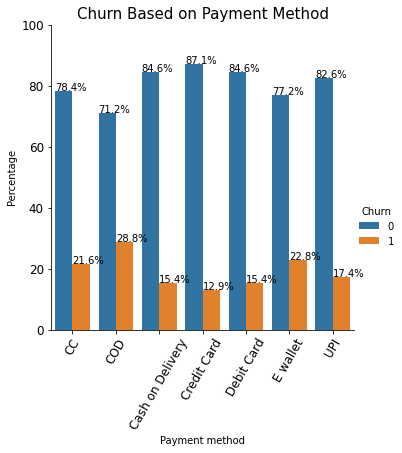

In [ ]:
new_df = df.groupby('PreferredPaymentMode')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='PreferredPaymentMode', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Payment method')
plt.ylabel('Percentage')
plt.xticks(rotation = 60)
plt.title('Churn Based on Payment Method', fontsize=15)

From the graph above it can be seen that the payment method that the customer uses has no significant effect on the possibility of the customer churning.

Gender

Text(0.5, 1.0, 'Churn Based on Gender')

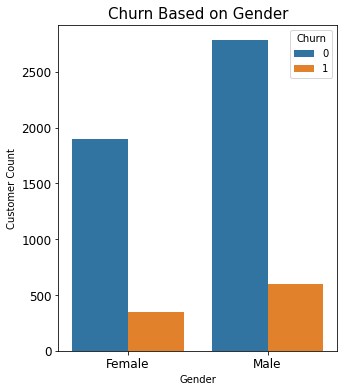

In [ ]:
gender = df.groupby(['Gender','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,6))
bar = sns.barplot(x="Gender", y="CustomerID", data=gender, hue="Churn")
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.title('Churn Based on Gender', fontsize=15)

Text(0.5, 1.0, 'Churn Based on Gender')

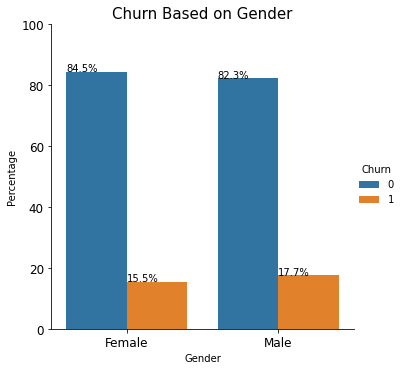

In [ ]:
new_df = df.groupby('Gender')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='Gender', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Churn Based on Gender', fontsize=15)

The graph shows that crunches are not affected by customer gender.

Hour Spend on App

Text(0.5, 1.0, 'Churn Based on Spent Hours')

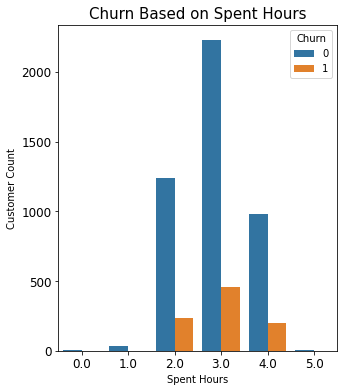

In [ ]:
hour = df.groupby(['HourSpendOnApp','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,6))
bar = sns.barplot(x="HourSpendOnApp", y="CustomerID", data=hour, hue="Churn")
plt.xlabel('Spent Hours')
plt.ylabel('Customer Count')
plt.title('Churn Based on Spent Hours', fontsize=15)

Text(0.5, 1.0, 'Churn Based on Spent Hours')

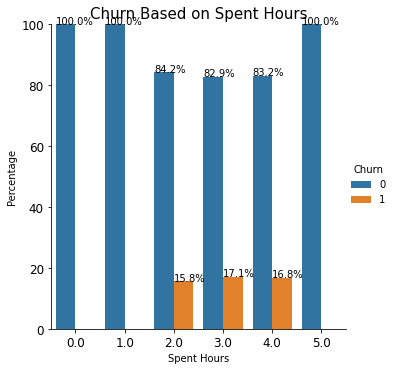

In [ ]:
new_df = df.groupby('HourSpendOnApp')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='HourSpendOnApp', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Spent Hours')
plt.ylabel('Percentage')
plt.title('Churn Based on Spent Hours', fontsize=15)

From the graphs obtained, it shows that the amount of time spent by customers using applications or accessing websites has no correlation with the potential for these customers to churn.

Number of Device Registered

Text(0.5, 1.0, 'Churn Based on the Number of Devices')

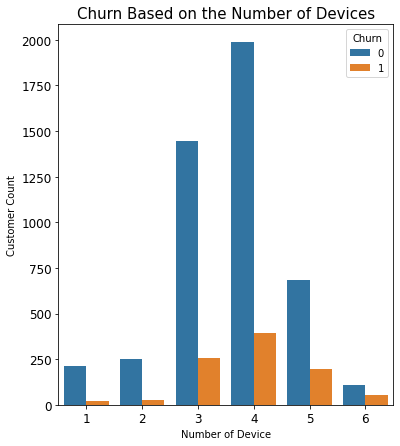

In [ ]:
device = df.groupby(['NumberOfDeviceRegistered','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(6,7))
bar = sns.barplot(x="NumberOfDeviceRegistered", y="CustomerID", data=device, hue="Churn")
plt.xlabel('Number of Device')
plt.ylabel('Customer Count')
plt.title('Churn Based on the Number of Devices', fontsize=15)

Text(0.5, 1.0, 'Churn Based on the Number of Devices')

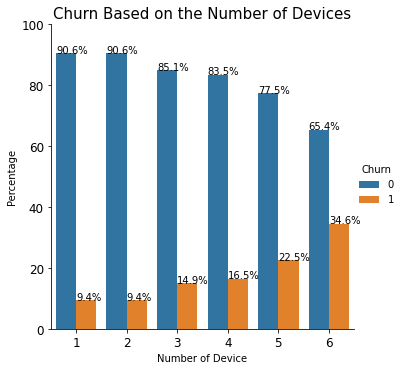

In [ ]:
new_df = df.groupby('NumberOfDeviceRegistered')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='NumberOfDeviceRegistered', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Number of Device')
plt.ylabel('Percentage')
plt.title('Churn Based on the Number of Devices', fontsize=15)

From the graph it can be concluded that the more devices a customer has, the higher the customer churn rate will be.

Prefered Order Cat

Text(0.5, 1.0, 'Churn Based on Prefered Order Cat')

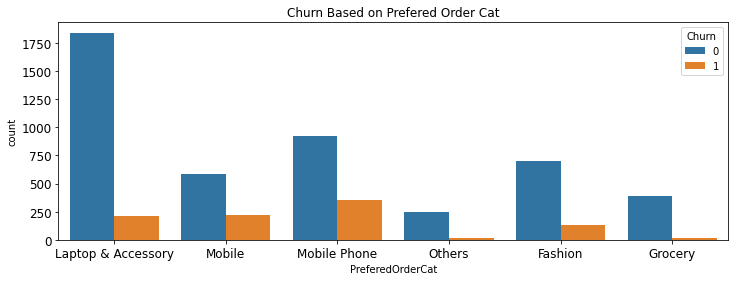

In [ ]:
sns.countplot(x='PreferedOrderCat', data=df, hue='Churn')
plt.title('Churn Based on Prefered Order Cat')

Based on the graph above, Preferred Order Cat 'Mobile Phone' has the most churn.

Satisfaction Score

Text(0.5, 1.0, 'Churn Based on Satisfaction Score')

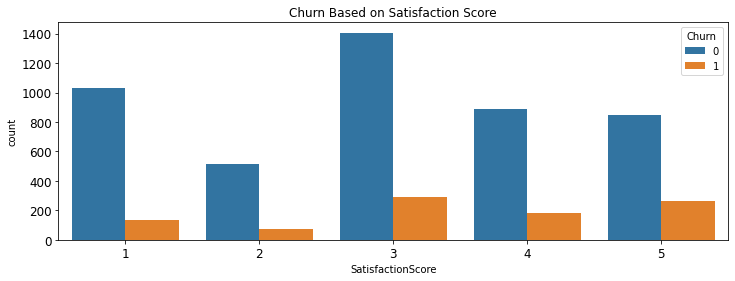

In [ ]:
sns.countplot(x='SatisfactionScore', data=df, hue='Churn')
plt.title('Churn Based on Satisfaction Score')

Based on the graph above, Satisfaction Scores 3, 4, 5 are still experiencing a lot of churn.

Marital Status

Text(0.5, 1.0, 'Churn Based on Marital Status')

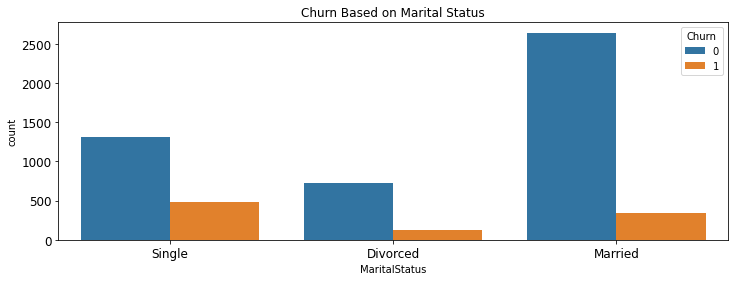

In [ ]:
sns.countplot(x='MaritalStatus', data=df, hue='Churn')
plt.title('Churn Based on Marital Status')

Based on the graph above, customers who are single experience a lot of churn, while customers who are divorced experience little churn.

Number Of Address

Text(0.5, 1.0, 'Churn Based on Number Of Address')

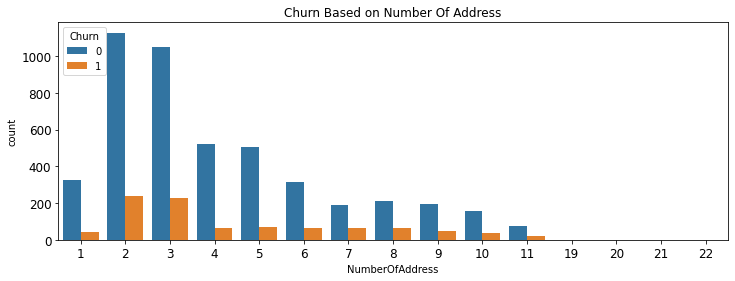

In [ ]:
sns.countplot(x='NumberOfAddress', data=df, hue='Churn')
plt.title('Churn Based on Number Of Address')

Based on the graph above, the Number Of Addresses that do the most churn are 2 and 3.

Complain

Text(0.5, 1.0, 'Churn Based on Complain')

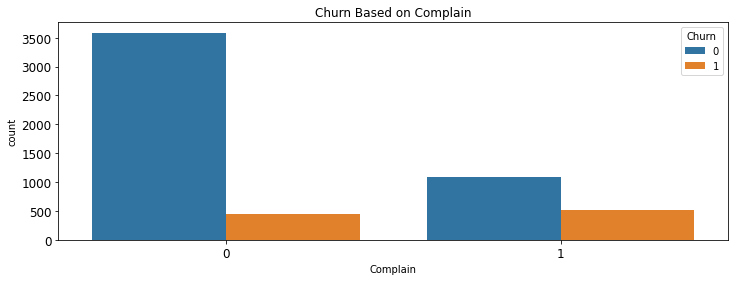

In [ ]:
sns.countplot(x='Complain', data=df, hue='Churn')
plt.title('Churn Based on Complain')

Based on the graph above, customers who complain experience a lot of churn compared to those who don't.

Order Amount Hike from Last Year

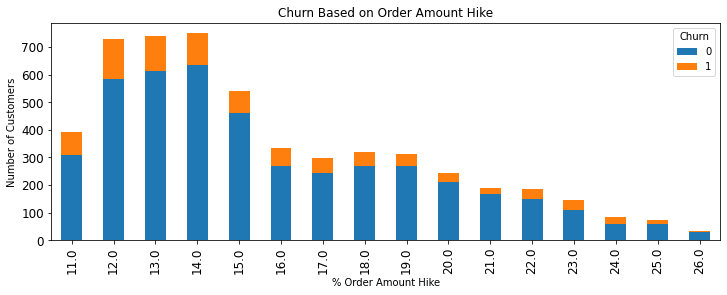

In [ ]:
OAH_churn = pd.crosstab(df["OrderAmountHikeFromlastYear"], df["Churn"])
OAH_churn.plot(kind = 'bar', stacked = 'true', title = "Churn Based on Order Amount Hike")
OAH_churn
plt.xlabel('% Order Amount Hike')
plt.ylabel('Number of Customers')
plt.show()

Based on the chart, the lower the percentage increase in orders from last year, especially in the 11-15 range, the higher the churn rate. However, the range above 16-25 is less significant because for every percentage there are always customers who churn.

Coupon Used

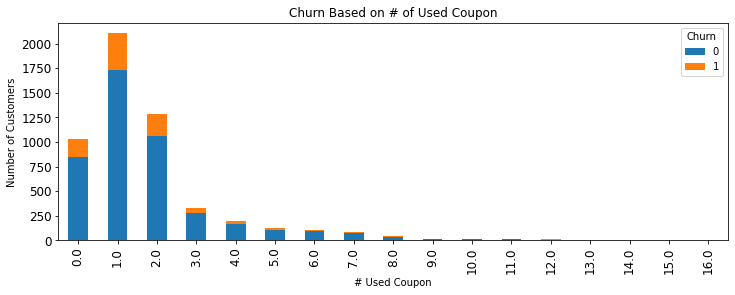

In [ ]:
CU_churn = pd.crosstab(df["CouponUsed"], df["Churn"])
CU_churn.plot(kind = 'bar', stacked = 'true', title = "Churn Based on # of Used Coupon")
CU_churn
plt.xlabel('# Used Coupon')
plt.ylabel('Number of Customers')
plt.show()

In the graph above, it can be seen that the level of customer churn is higher for customers who use a few coupons (1-2 only) even by customers who don't use coupons at all.

Order Count

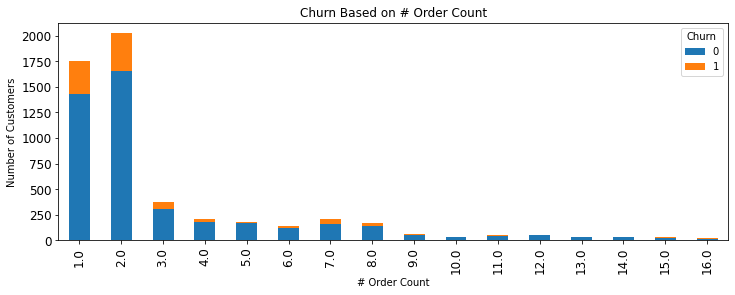

In [ ]:
OC_churn = pd.crosstab(df["OrderCount"], df["Churn"])
OC_churn.plot(kind = 'bar', stacked = 'true', title = "Churn Based on # Order Count")
OC_churn
plt.xlabel('# Order Count')
plt.ylabel('Number of Customers')
plt.show()

From the graph above, customers who only order 1-2 times tend to churn. It is possible that this type of customer is just trying and doesn't feel right or is called a one time buyer.

Day Since Last Order

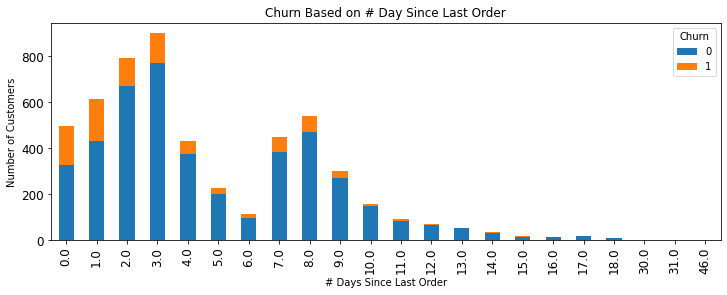

In [ ]:
DLO_churn = pd.crosstab(df["DaySinceLastOrder"], df["Churn"])
DLO_churn.plot(kind = 'bar', stacked = 'true', title = "Churn Based on # Day Since Last Order")
DLO_churn
plt.xlabel('# Days Since Last Order')
plt.ylabel('Number of Customers')
plt.show()

From the graph above, customers who tend to churn are customers who have recently placed an order. This is possible because there are customers who feel disappointed with the transactions made.

Cashback Amount

In [ ]:
dfCA = df
dfCA['CashbackAmountGroup'] = np.where(dfCA['CashbackAmount']<125,'Low', np.where(dfCA['CashbackAmount']<175, 'Medium', 'High'))

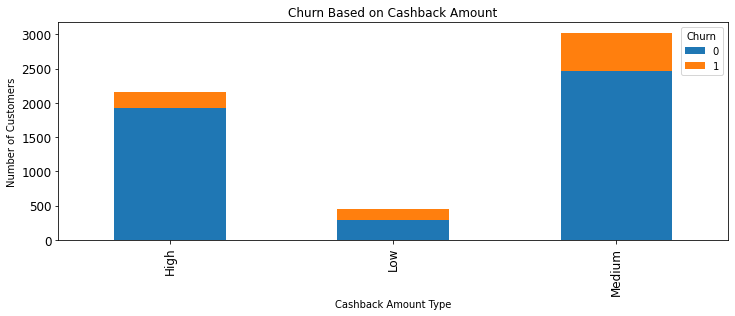

In [ ]:
DLO_CA = pd.crosstab(dfCA["CashbackAmountGroup"], dfCA["Churn"])
DLO_CA.plot(kind = 'bar', stacked = 'true', title = "Churn Based on Cashback Amount")
DLO_CA
plt.xlabel('Cashback Amount Type')
plt.ylabel('Number of Customers')
plt.show()

In this graph, users are grouped based on the amount of cashback earned. We determine that customers who get less than 125 cashback are categorized as "Low", 125-175 are categorized as 'Medium", and more than 175 are considered high.

In the graph data, there is no significant difference between the number of customers who churn and the total cashback received. This is also in line with the heatmap that the correlation between the amount of cashback earned and customers who churn is not significantly correlated

## Data Pre-Processing

### Handling Missing Values

In [ ]:
df2 = df.copy()

In [ ]:
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [ ]:
df2['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

In [ ]:
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

In [ ]:
df2['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'COD', 'E wallet'],
      dtype=object)

In [ ]:
df2.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
CashbackAmountGroup              0
dtype: int64

**Data imputation using the fillna command**

Tenure -> median

WarehouseToHome -> median

HourSpendOnApp -> median

OrderAmountHikeFromlastYear -> median

CouponUsed -> median

DaySinceLastOrder -> median

*The reason for replacing the value using the median is because the mean and median values are not too far apart, so the median value is chosen because it has an absolute value.*

In [ ]:
df2['Tenure'].fillna(df2['Tenure'].median(), inplace=True)
df2['WarehouseToHome'].fillna(df2['WarehouseToHome'].median(), inplace=True)
df2['HourSpendOnApp'].fillna(df2['HourSpendOnApp'].median(), inplace=True)
df2['OrderAmountHikeFromlastYear'].fillna(df2['OrderAmountHikeFromlastYear'].median(), inplace=True)
df2['CouponUsed'].fillna(df2['CouponUsed'].median(), inplace=True)
df2['OrderCount'].fillna(df2['OrderCount'].median(), inplace=True)
df2['DaySinceLastOrder'].fillna(df2['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
df2.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CashbackAmountGroup            0
dtype: int64

## Statistical analysis after data imputation

*  Univariate Analysis (Boxplot) after data imputation

*   Multivariate Analysis (KDE Pairplot) after data imputation

*   Multivariate Analysis (Heatmap) after data imputation



*Perform data visualization after carrying out the data imputation process for handling missing values to compare with data visualization at the previous stage and also to look for data that needs further treatment.*

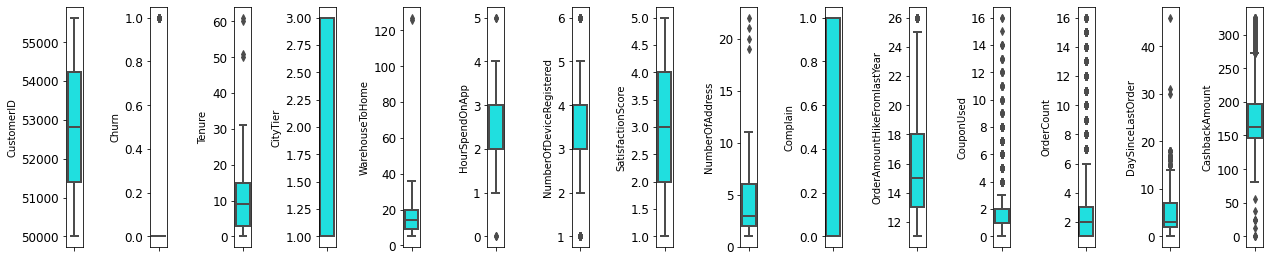

In [ ]:
# boxplot diagrams
plt.figure(figsize=(18,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='cyan', orient='v')
    plt.tight_layout(pad = 2)

In [ ]:
# Pair Plots (Numeric)
sns.pairplot(df2, diag_kind='kde', hue='Churn')

Output hidden; open in https://colab.research.google.com to view.

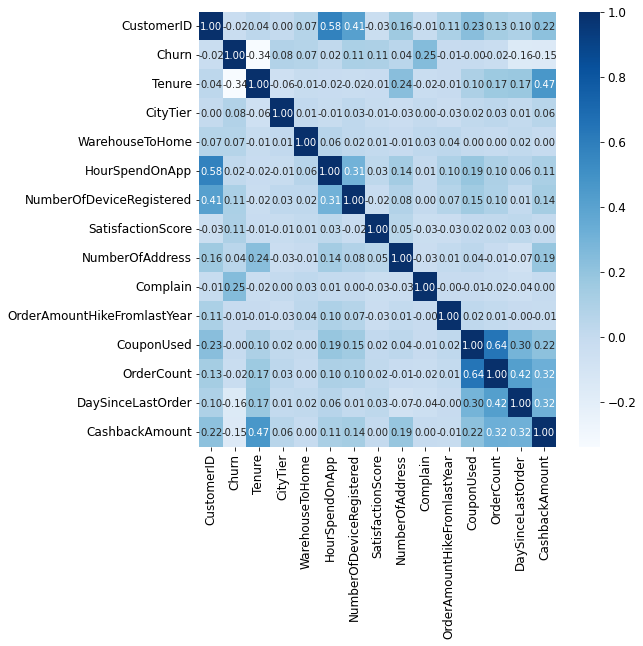

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), cmap='Blues', annot=True, fmt='.2f')

## Handling Duplicated Data

In [ ]:
df2.duplicated().sum()

0

## Outlier

In [ ]:
from scipy import stats

In [ ]:
print(f'Number of rows before filtering outliers : {len(df2)}')

filtered_entries = np.array ([True] * len(df2))

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df2[filtered_entries]
print(f'Number of rows before filtering outliers : {len(df2)}')

Number of rows before filtering outliers : 5630
Number of rows before filtering outliers : 5619


## Feature Encoding

In [ ]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(mapping_gender)

In [ ]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df2[cat], prefix=cat)
  df2 = df2.join(onehots)

In [ ]:
df2 = df2.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   CityTier                             5619 non-null   int64  
 4   WarehouseToHome                      5619 non-null   float64
 5   Gender                               5619 non-null   int64  
 6   HourSpendOnApp                       5619 non-null   float64
 7   NumberOfDeviceRegistered             5619 non-null   int64  
 8   SatisfactionScore                    5619 non-null   int64  
 9   NumberOfAddress                      5619 non-null   int64  
 10  Complain                             5619 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [ ]:
df2 = df2.drop(columns=['CashbackAmountGroup']).copy()

In [ ]:
df2.head()

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  Gender  \
0       50001      1     4.0         3              6.0       0   
1       50002      1     9.0         1              8.0       1   
2       50003      1     9.0         1             30.0       1   
3       50004      1     0.0         3             15.0       1   
4       50005      1     0.0         1             12.0       1   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0                         4                  3   
3             2.0                         4                  5   
4             3.0                         3                  5   

   NumberOfAddress  ...  PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
0                9  ...                         0                         0   
1                7  ...                         1                         0   
2                6  ...                         0                         0   
3                8  ...                         0                         0   
4                3  ...                         0                         0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                        0                              0   
1                        1                              0   
2                        1                              0   
3                        0                              0   
4                        1                              0   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 32 columns]

## Feature Transformation

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature = df2.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [ ]:
transform = feature_normal + feature_non_normal
X = df2[feature]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

Tenure  CityTier  WarehouseToHome  Gender  HourSpendOnApp  \
3924  1.306801  1.500520        -0.779734       1        0.084913   
2198 -1.209991 -0.701138        -0.191320       1       -1.324215   
5349 -0.371060  1.500520        -0.779734       1        1.494042   
1337  0.228176  1.500520         1.691603       0       -1.324215   
1486  0.947259 -0.701138         2.280017       1       -1.324215   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
3924                  0.306939           0.668818         1.862855 -0.622729   
2198                 -0.668175           1.389097        -0.845974 -0.622729   
5349                  0.306939          -1.492020        -0.458998 -0.622729   
1337                  0.306939          -1.492020        -1.232950 -0.622729   
1486                 -0.668175          -1.492020         0.701928 -0.622729   

      OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_UPI  \
3924                    -1.018592  ...                         0   
2198                     2.584036  ...                         0   
5349                    -0.187216  ...                         0   
1337                    -1.295717  ...                         0   
1486                    -0.741467  ...                         0   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
3924                         0                         0   
2198                         0                         0   
5349                         0                         0   
1337                         0                         1   
1486                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
3924                                    1                        0   
2198                                    0                        1   
5349                                    1                        0   
1337                                    0                        0   
1486                                    0                        1   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
3924                              0                        0   
2198                              0                        0   
5349                              0                        0   
1337                              0                        0   
1486                              0                        0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
3924                       0                      1                     0  
2198                       0                      0                     1  
5349                       0                      1                     0  
1337                       0                      1                     0  
1486                       0                      0                     1  

[5 rows x 30 columns]

In [ ]:
df2.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5619.000000  5619.000000  5619.000000  5619.000000      5619.000000   
mean   52816.221392     0.168713    10.125467     1.653853        15.563623   
std     1625.642617     0.374532     8.350080     0.915021         8.342056   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51410.500000     0.000000     3.000000     1.000000         9.000000   
50%    52815.000000     0.000000     9.000000     1.000000        14.000000   
75%    54224.500000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

            Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5619.000000     5619.000000               5619.000000   
mean      0.600819        2.934508                  3.688201   
std       0.489774        0.705456                  1.023898   
min       0.000000        0.000000                  1.000000   
25%       0.000000        2.000000                  3.000000   
50%       1.000000        3.000000                  4.000000   
75%       1.000000        3.000000                  4.000000   
max       1.000000        5.000000                  6.000000   

       SatisfactionScore  NumberOfAddress  ...  PreferredPaymentMode_UPI  \
count        5619.000000      5619.000000  ...               5619.000000   
mean            3.065848         4.216409  ...                  0.073679   
std             1.380046         2.584108  ...                  0.261270   
min             1.000000         1.000000  ...                  0.000000   
25%             2.000000         2.000000  ...                  0.000000   
50%             3.000000         3.000000  ...                  0.000000   
75%             4.000000         6.000000  ...                  0.000000   
max             5.000000        22.000000  ...                  1.000000   

       PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
count               5619.000000               5619.000000   
mean                   0.147001                  0.072611   
std                    0.354139                  0.259520   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
count                          5619.000000              5619.000000   
mean                              0.363944                 0.143976   
std                               0.481176                 0.351096   
min                               0.000000                 0.000000   
25%                               0.000000                 0.000000   
50%                               0.000000                 0.000000   
75%                               1.000000                 0.000000   
max                               1.000000                 1.000000   

       PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
count                    5619.000000              5619.000000   
mean                        0.225841                 0.046628   
std                         0.418172                 0.210858   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
count             5619.000000            5619.000000           5619.000000  
mean                 0.150739               0.529632              0.319630  
std                  0.35782

## Class Imbalance

In [ ]:
df2['Churn_Class'] = df2['Churn']>0.9
print(df2['Churn_Class'].value_counts())

False    4671
True      948
Name: Churn_Class, dtype: int64


In [ ]:
x = df2[[col for col in df2.columns if col not in ['Churn_Class','Churn']]].values
y = df2['Churn_Class'].values
print(x.shape)
print(y.shape)

(5619, 31)
(5619,)


In [ ]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(x, y)
x_smote, y_smote = over_sampling.SMOTE().fit_resample(x, y)

In [ ]:
print(pd.Series(y).value_counts())


False    4671
True      948
dtype: int64


In [ ]:
print(pd.Series(y_over).value_counts())


True     4671
False    4671
dtype: int64


In [ ]:
print(pd.Series(y_under).value_counts())


False    948
True     948
dtype: int64


In [ ]:
print(pd.Series(y_smote).value_counts())


True     4671
False    4671
dtype: int64


# Supervised Learning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.80
Recall (Test Set): 0.87
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9705914504568053


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.69
Recall (Test Set): 0.54
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8867726055233682
roc_auc (crossval test): 0.8843999212955266


### ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.58
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9296688107323204
roc_auc (crossval test): 0.9187608592018532


### XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=3)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.76
Recall (Test Set): 0.63
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9596599134998665
roc_auc (crossval test): 0.9480078097263744


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.78
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


To avoid false positive churn, we decided to choose the model with the smallest ROC-AUC gap and the highest precision. From several model test results, Random Forest is the most suitable algorithm model.

In [ ]:
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(X_train, y_train)

In [ ]:
# Random Forest Modeling after Oversampling

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_smote, y_train_smote)

y_pred_over = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.86
Recall (Test Set): 0.82
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


### K-Fold Cross Validation

Check Train and Validation in each iteration

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd

dataset = df2
X = df2[feature]
y = df2['Churn']
kf = KFold(n_splits=5, random_state=3, shuffle=True)
kf.get_n_splits(X)

5

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   1    2    3 ... 5616 5617 5618] TEST: [   0    6    9 ... 5609 5611 5613]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   4    8   19 ... 5600 5607 5614]
TRAIN: [   0    1    2 ... 5614 5616 5618] TEST: [   3    5   16 ... 5612 5615 5617]
TRAIN: [   0    3    4 ... 5614 5615 5617] TEST: [   1    2   10 ... 5608 5616 5618]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   7   13   14 ... 5604 5605 5606]


Cross Validation in Validation Set Only


In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.991035757454845

Cross Validation in Train Set & Validation Set


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9908933273369067


After k-fold cross validation, the model is best-fit, as can be seen from the train scores and test scores, which have very small differences.

Hyperparameter Tuning


In [ ]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=3)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=3, cv=5)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.67
Recall (Test Set): 0.30
F1-Score (Test Set): 0.42
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.83
roc_auc (crossval train): 0.9974605168250431
roc_auc (crossval test): 0.9857799176417457


Learning Curve

param value: 10; train: 0.9952768398375653; test: 0.8080908200311185
param value: 10; train: 0.9952860894617992; test: 0.7657379127528381
param value: 11; train: 0.9951282795462966; test: 0.7977756007606753
param value: 11; train: 0.9947245995172261; test: 0.7519823661614706
param value: 12; train: 0.9932772220924444; test: 0.8110903013888089
param value: 13; train: 0.9934534368724944; test: 0.7604016596553911
param value: 13; train: 0.9929070483552422; test: 0.7753702529821933
param value: 14; train: 0.9927306448073507; test: 0.8134501238978851
param value: 14; train: 0.9924954400768284; test: 0.8016250792370196
param value: 15; train: 0.9913495248949389; test: 0.7858842851380166
param value: 16; train: 0.9903588712626917; test: 0.7923644326629401
param value: 16; train: 0.9903297066311783; test: 0.7713911139284274
param value: 17; train: 0.9900723216792788; test: 0.7825851437791738
param value: 17; train: 0.989721213494069; test: 0.7751109318273497
param value: 18; train: 0.988376148

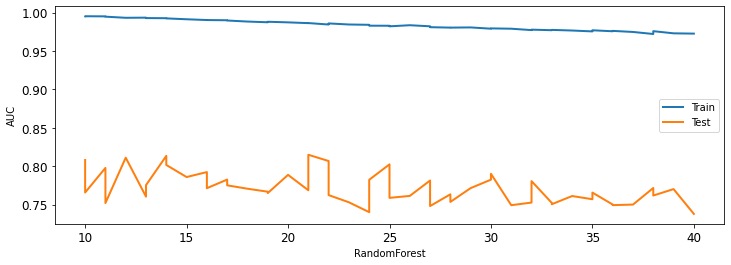

In [ ]:
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(X_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       938
           1       0.95      0.78      0.85       185

    accuracy                           0.96      1123
   macro avg       0.95      0.88      0.91      1123
weighted avg       0.96      0.96      0.95      1123



Feature Importance


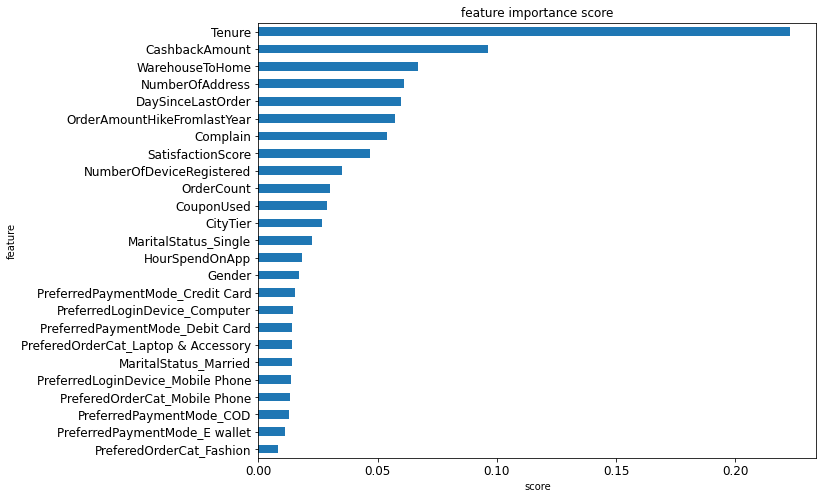

In [ ]:
show_feature_importance(rf)

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.0 MB/s 


In [ ]:
import shap

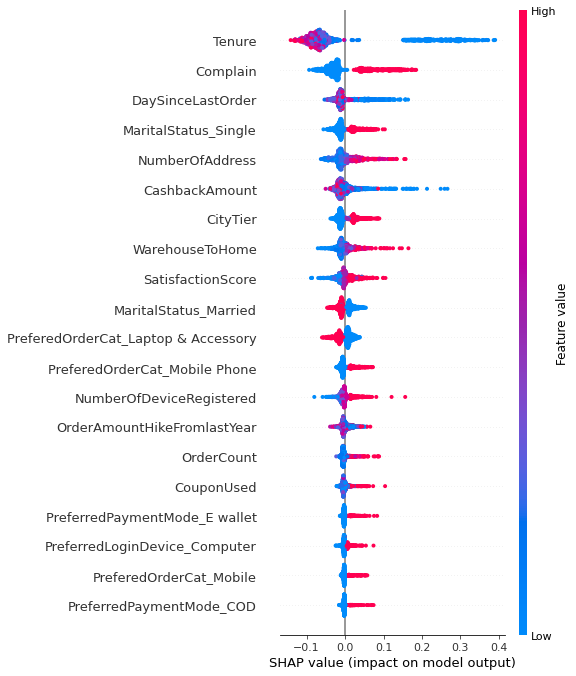

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)